Sanket Gadekar (Infosys: AI Intern)

## MILESTONE 2: Model Building and Evaluation

# A. Load and Process Dataset from s3-Bucket

### Importing Libraries

In [4]:
import boto3
import pandas as pd

### Initialize the Session using credentials

In [5]:
session = boto3.Session(
    aws_access_key_id='your_aws_access_key_id',
    aws_secret_access_key='your_aws_secret_access_key++lx9PzOS4cAPDb',
    region_name='your_region_name'
)

### Access s3 Resources

In [6]:
s3 = session.resource('s3')

### Define the Bucket

In [7]:
bucket_name = 'online-fraud-detection-internship'
bucket = s3.Bucket(bucket_name)

### Define the file name

In [8]:
s3_file_name = 'Sanket_Gadekar_Final_Dataset.csv'

### Load Dataset into Pandas Dataframe

In [9]:
df = pd.read_csv(f"s3://{bucket_name}/{s3_file_name}")

In [10]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,CASH_OUT,722832.95,722832.95,0.00,1
1,CASH_OUT,228264.60,0.00,0.00,0
2,CASH_OUT,249222.80,19198.00,0.00,0
3,TRANSFER,55920.39,55920.39,0.00,1
4,CASH_OUT,163353.64,163353.64,0.00,1
5,TRANSFER,914767.58,0.00,0.00,0
6,TRANSFER,3733104.07,3733104.07,0.00,1
7,PAYMENT,14091.48,12164.00,0.00,0
8,PAYMENT,10275.97,57594.74,47318.76,0
9,CASH_OUT,321045.95,571080.63,250034.68,0


### Handle duplicate values

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 161


In [12]:
# if duplicates found then use:
# df = df.drop_duplicates()

### Check for Missing Values

In [13]:
null_values = df.isnull().sum()
print(null_values)

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64


### Convert Categorical Features to Numerical Representations

[ CASH_IN = 0 ;
CASH_OUT = 1 ;
DEBIT = 2 ;
PAYMENT = 3 ; 
TRANSFER = 4 ]

In [14]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical representations
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the label encoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,722832.95,722832.95,0.00,1
1,1,228264.60,0.00,0.00,0
2,1,249222.80,19198.00,0.00,0
3,4,55920.39,55920.39,0.00,1
4,1,163353.64,163353.64,0.00,1
5,4,914767.58,0.00,0.00,0
6,4,3733104.07,3733104.07,0.00,1
7,3,14091.48,12164.00,0.00,0
8,3,10275.97,57594.74,47318.76,0
9,1,321045.95,571080.63,250034.68,0


### Map Categorical Name for 'isFraud' Column

In [16]:
df["isFraud"] = df["isFraud"].map({
    0: "No Fraud", 1: "Fraud"
})

In [17]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,722832.95,722832.95,0.00,Fraud
1,1,228264.60,0.00,0.00,No Fraud
2,1,249222.80,19198.00,0.00,No Fraud
3,4,55920.39,55920.39,0.00,Fraud
4,1,163353.64,163353.64,0.00,Fraud
5,4,914767.58,0.00,0.00,No Fraud
6,4,3733104.07,3733104.07,0.00,Fraud
7,3,14091.48,12164.00,0.00,No Fraud
8,3,10275.97,57594.74,47318.76,No Fraud
9,1,321045.95,571080.63,250034.68,No Fraud


# B. Model Development and Evaluation

### Import Libraries

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Define the feature set (X) and the target variable (y)

In [19]:
# Selecting features and converting to numpy array
X = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
X = np.array(X)

# Selecting target and converting to numpy array, then flattening it
y = df[["isFraud"]]
y = np.array(y).ravel()

In [20]:
X.shape, y.shape

((16426, 4), (16426,))

### Splitting Dataset into Training and Testing Dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)

### Define and Build the Model

Here I'm Using Random Forest Classifier:
    Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

In [22]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation Score of Model

In [23]:
model_rf.score(X_test, y_test)

0.9920876445526476

~ Model Score: 0.9920876445526476

### Confusion Matrix

Classification Report:

              precision    recall  f1-score   support

       Fraud       0.99      0.99      0.99       846
    No Fraud       0.99      0.99      0.99       797

    accuracy                           0.99      1643
   macro avg       0.99      0.99      0.99      1643
weighted avg       0.99      0.99      0.99      1643





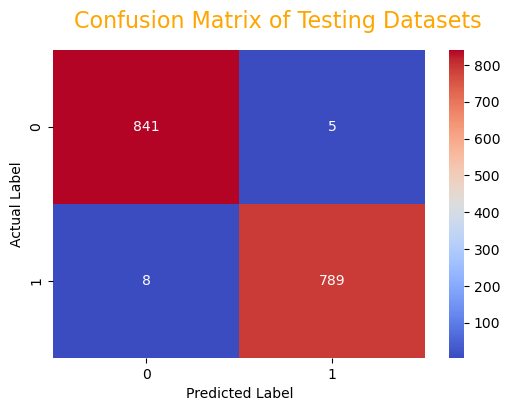

In [24]:
y_preds = model_rf.predict(X_test)
print(f"Classification Report:\n\n{classification_report(y_test, y_preds)}\n\n")

cf_matrix = confusion_matrix(y_test, y_preds)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix of Testing Datasets", color="orange", fontsize=16);
ax.set(xlabel="Predicted Label", ylabel="Actual Label");

### Calculate the Model Performance Metrics

In [25]:
# Ensure y_test is a pandas Series
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test)

# Predict the probabilities and the labels
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]
y_pred = model_rf.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Fraud')
recall = recall_score(y_test, y_pred, pos_label='Fraud')
f1 = f1_score(y_test, y_pred, pos_label='Fraud')
roc_auc = roc_auc_score(y_test == 'Fraud', y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.9921
Precision: 0.9906
Recall: 0.9941
F1-Score: 0.9923
ROC-AUC: 0.0042


### Plot ROC-Curve

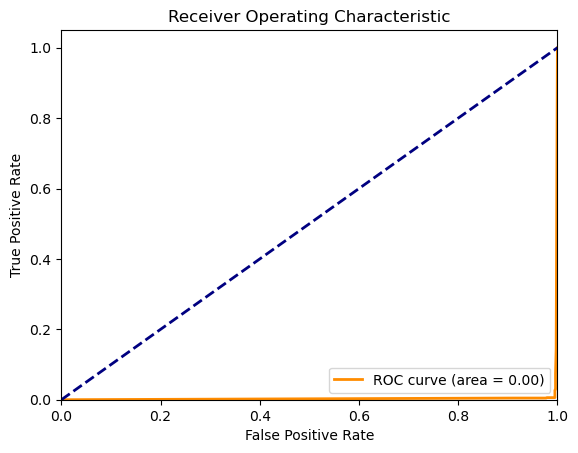

In [27]:
fpr, tpr, _ = roc_curve(y_test.map({'No Fraud': 0, 'Fraud': 1}), y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Test the Model by Giving Inputs

In [28]:
test = np.array([[3, 9839.64, 170136.0, 160296.36]])
model_rf.predict(test)

array(['No Fraud'], dtype=object)

Save the Model into Local

In [29]:
import pickle

pickle.dump(model_rf, open("Model_RF.pkl", "wb"))